In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
xTrain = pd.read_csv('xTrain_System1.csv')
xTest = pd.read_csv('xTest_System1.csv')
yTrain = pd.read_csv('yTrain_System1.csv')
yTest = pd.read_csv('yTest_System1.csv')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV

In [4]:
### General look for different kinds of models
# We first try general tree model (the data do not need standardization)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
rs = 13 # random_state
classifiers = {
    "DecisionTree" : DecisionTreeClassifier(random_state = rs),
    "RandomForest" : RandomForestClassifier(random_state = rs),
    "XGBoost" : XGBClassifier(random_state = rs),
    "LightGBM": LGBMClassifier(random_state = rs)
}

train_scores = []
test_scores = []
fnr_scores = []
auc_scores = []

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(xTrain, yTrain)
    train_score = classifier.score(xTrain, np.ravel(yTrain))
    train_scores.append(train_score)
    test_score = classifier.score(xTest, yTest)
    test_scores.append(test_score)
    
    y_pred = classifier.predict(xTest)
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    fnr = fn/(tp+fn)
    print("false negative rate:",fnr)
    fnr_scores.append(fnr)
    
    print(classification_report(yTest, y_pred))
    
    (fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
    area = auc(fpr,tpr)
    print("AUC area",area)
    auc_scores.append(area)
    print('')

print('train_scores',train_scores)
print('test_scores',test_scores)
print('fnr_scores',fnr_scores)

DecisionTree
false negative rate: 0.19953566361408487
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7753
           1       0.91      0.80      0.85      7753

    accuracy                           0.86     15506
   macro avg       0.86      0.86      0.86     15506
weighted avg       0.86      0.86      0.86     15506

AUC area 0.8597317167548045

RandomForest
false negative rate: 0.164839416999871
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7753
           1       0.92      0.84      0.88      7753

    accuracy                           0.88     15506
   macro avg       0.88      0.88      0.88     15506
weighted avg       0.88      0.88      0.88     15506

AUC area 0.8815297304269315

XGBoost
[02:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

In [5]:
# Because for model Logistic, KNN, Support Vector Machine, we need to standardize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(xTrain)
xTrain_standardized = pd.DataFrame(scaler.transform(xTrain), columns=xTrain.columns)
#xTrain_standardized 
scaler.fit(xTest)
xTest_standardized = pd.DataFrame(scaler.transform(xTest), columns=xTest.columns)
xTest_standardized 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS,State servant,Working,Commercial associate,Student,...,Accountants,Security staff,Medicine staff,Cooking staff,IT staff,Cleaning staff,Low-skill Laborers,HR staff,Secretaries,Realty agents
0,1.592528,1.444433,0.877779,1.188052,-0.376652,0.758624,1.871595,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,3.297912,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
1,-0.627932,1.444433,0.877779,0.138679,2.581980,-0.686779,-0.609681,2.561637,-0.327272,-0.013911,...,-0.482197,-0.094811,-0.345701,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
2,-0.627932,1.444433,-1.139239,0.001804,-0.371777,-0.686779,1.871595,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,-0.345701,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
3,-0.627932,-0.692313,0.877779,-0.705382,-0.401634,0.758624,-0.609681,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,-0.345701,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
4,1.592528,1.444433,-1.139239,0.366803,-0.387073,0.758624,-0.609681,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,3.297912,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,-0.627932,-0.692313,-1.139239,-0.184287,-0.411747,1.976489,-0.609681,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,-0.345701,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
15502,-0.627932,-0.692313,0.877779,-1.230069,-0.370510,-0.686779,-0.609681,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,-0.345701,3.240106,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
15503,1.592528,-0.692313,-1.139239,1.735551,-0.382504,-0.686779,1.871595,-0.392942,-0.327272,-0.013911,...,-0.482197,-0.094811,0.644781,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572
15504,-0.627932,-0.692313,0.877779,0.138679,-0.370623,-0.686779,0.790558,-0.392942,1.337920,-0.013911,...,-0.482197,-0.094811,-0.345701,-0.195068,-0.085626,-0.05295,-0.367564,-0.061314,-0.136656,-0.070572


In [6]:
# Use standardized data for all models
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state = rs),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(random_state = rs),
    'Neural Network': MLPClassifier(random_state = rs),
    "DecisionTree" : DecisionTreeClassifier(random_state = rs),
    "RandomForest" : RandomForestClassifier(random_state = rs),
    "XGBoost" : XGBClassifier(random_state = rs),
    "LightGBM": LGBMClassifier(random_state = rs)
}

train_scores = []
test_scores = []
fnr_scores = []
auc_scores = []

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(xTrain_standardized, yTrain)
    train_score = classifier.score(xTrain_standardized, yTrain)
    train_scores.append(train_score)
    test_score = classifier.score(xTest_standardized, yTest)
    test_scores.append(test_score)
    
    y_pred = classifier.predict(xTest_standardized)
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    fnr = fn/(tp+fn)
    print("false negative rate:",fnr)
    fnr_scores.append(fnr)
    
    print(classification_report(yTest, y_pred))
    
    (fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
    area = auc(fpr,tpr)
    print('AUC area',area)
    auc_scores.append(area)
    print('')

print('train_scores',train_scores)
print('test_scores',test_scores)
print('fnr_scores',fnr_scores)
# In terms of test score, they perform worse than tree model without standardiztion.
# Thus, we continue tree model without data standardization with grid search.

LogisticRegression
false negative rate: 0.40190893847542886
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      7753
           1       0.63      0.60      0.61      7753

    accuracy                           0.62     15506
   macro avg       0.62      0.62      0.62     15506
weighted avg       0.62      0.62      0.62     15506

AUC area 0.6236295627499032

KNeighbors
false negative rate: 0.34012640268283245
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      7753
           1       0.86      0.66      0.75      7753

    accuracy                           0.78     15506
   macro avg       0.79      0.78      0.77     15506
weighted avg       0.79      0.78      0.77     15506

AUC area 0.7775054817490004

SVC
false negative rate: 0.35792596414291244
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      7753
           1       0.9

In [7]:
# Grid search: Random Forest
from sklearn.model_selection import GridSearchCV 
parameters = { 
     'n_estimators':(10, 30, 50,100), 
     'max_depth':(4,6,8,10,15), 
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16),
} 

model_rf = GridSearchCV(RandomForestClassifier(random_state = rs),parameters,cv=5)
model_rf.fit(xTrain , np.ravel(yTrain))
model_rf.best_score_, model_rf.best_params_

(0.8752429774242382,
 {'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100})

train score 0.8859401780284182
test score 0.8645040629433768
false negative rate: 0.24467947891138914
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7753
           1       0.97      0.76      0.85      7753

    accuracy                           0.86     15506
   macro avg       0.88      0.86      0.86     15506
weighted avg       0.88      0.86      0.86     15506

AUC area 0.8645040629433767


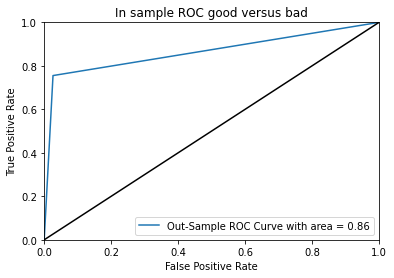

Text(0.5, 0, 'Relative Importance')

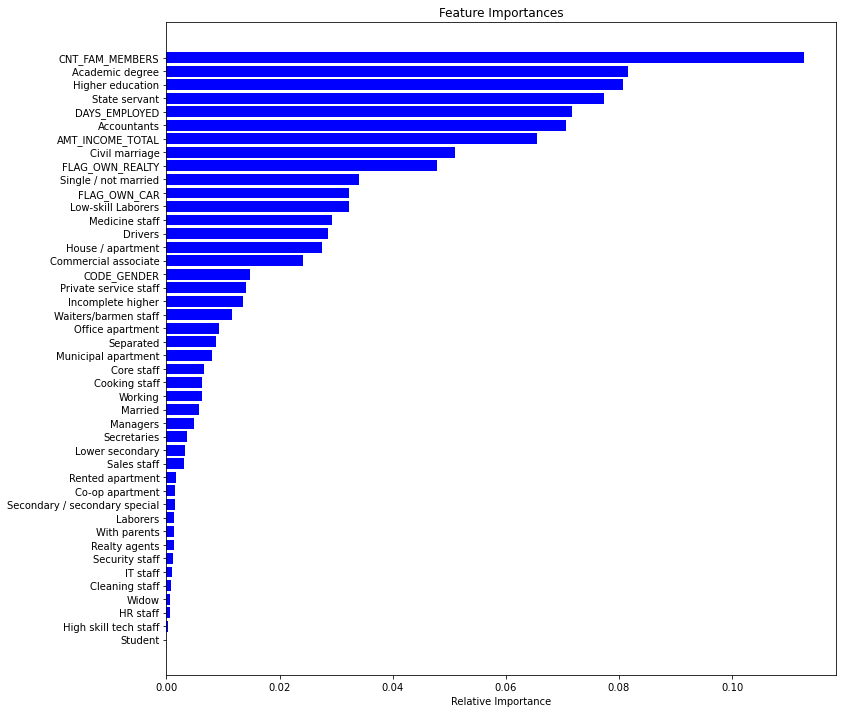

In [16]:
import pylab as pl
model_rf_best = RandomForestClassifier(n_estimators=100, max_depth = 15,min_samples_leaf = 4,min_samples_split=2,random_state = rs)
classifier = model_rf_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.show()

model = model_rf_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
feature_names = [key for key in xTrain]
importances = model.feature_importances_ 
indices = np.argsort(importances) 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance') 

train score 0.9400398075966163
test score 0.8815297304269315
false negative rate: 0.164839416999871
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7753
           1       0.92      0.84      0.88      7753

    accuracy                           0.88     15506
   macro avg       0.88      0.88      0.88     15506
weighted avg       0.88      0.88      0.88     15506

AUC area 0.8815297304269315


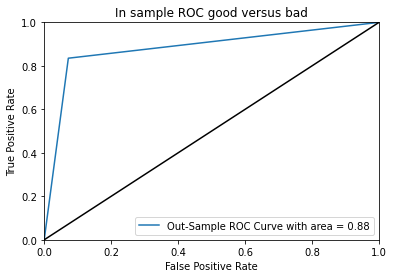

Text(0.5, 0, 'Relative Importance')

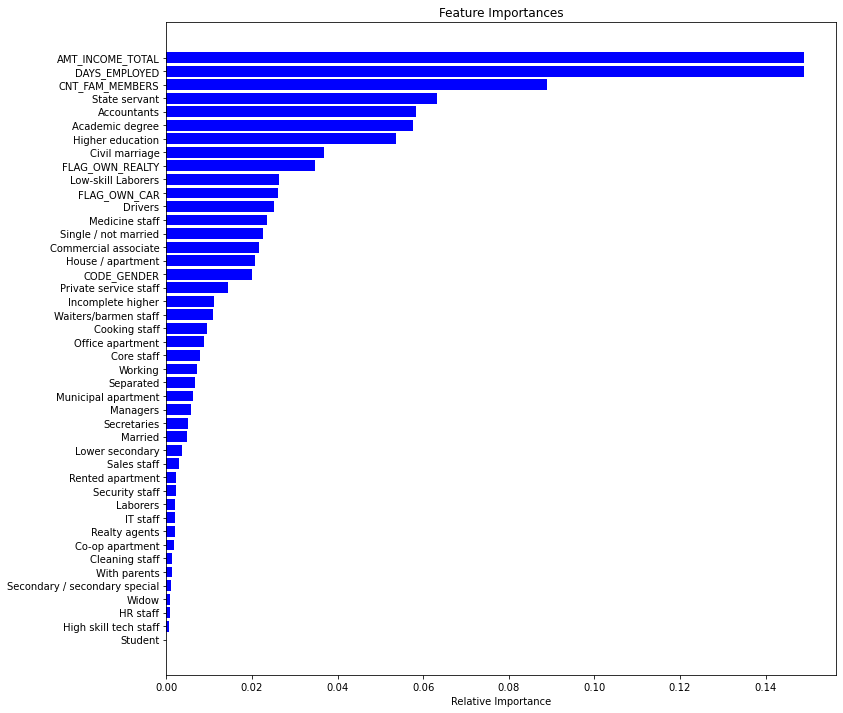

In [17]:
# We notice our default parameter perform better
model_rf_1 = RandomForestClassifier(random_state = rs)
classifier = model_rf_1
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() 
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') 
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.show()

model = model_rf_1
# Draw feature importance level
%matplotlib inline
feature_names = [key for key in xTrain]
importances = model.feature_importances_ 
indices = np.argsort(importances) 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance') 
#pl.show()

In [8]:
# Grid search: XGBoost 
parameters = { # due to computer capacity, I didn't tune many parameters as it will long time to run
        'n_estimators':(10, 30, 50,100), 
        'max_depth':(4,6,8,10,15),
    }
model_xgb = GridSearchCV(estimator = XGBClassifier( 
        learning_rate =0.3, 
        min_child_weight=1, 
        subsample=0.6, 
        colsample_bytree=0.7,
        objective= 'binary:logistic', 
        nthread=4, 
        scale_pos_weight=1, 
        seed=rs), 
    param_grid = parameters, 
    #scoring='roc_auc',
    #n_jobs=4, 
    cv=5)
model_xgb.fit(xTrain,yTrain)
model_xgb.fit(xTrain, np.ravel(yTrain))
model_xgb.best_score_, model_xgb.best_params_

[05:31:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

(0.9161836058281947, {'max_depth': 15, 'n_estimators': 100})

[10:59:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train score 0.9386299552164538
test score 0.8892686701921837
false negative rate: 0.15078034309299626
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7753
           1       0.92      0.85      0.88      7753

    accuracy                           0.89     15506
   macro avg       0.89      0.89      0.89     15506
weighted avg       0.89      0.89      0.89     15506

AUC area 0.8892686701921836


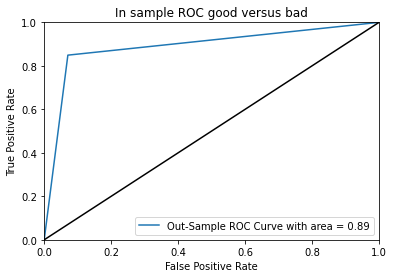

Text(0.5, 0, 'Relative Importance')

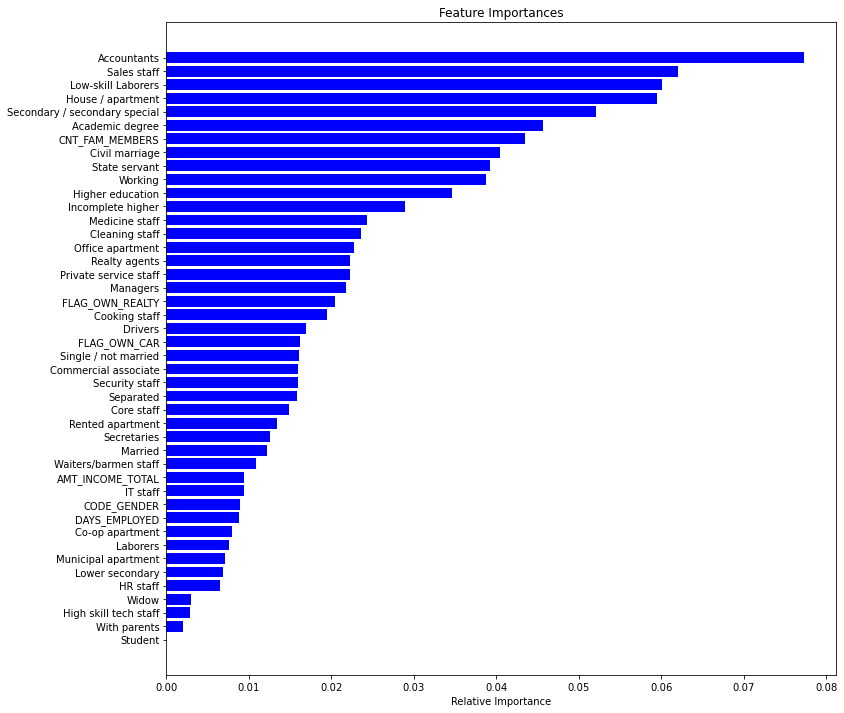

In [19]:
model_xgb_best = XGBClassifier(n_estimators=100, max_depth = 15, random_state = rs)
classifier = model_xgb_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.show()

model = model_xgb_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
feature_names = [key for key in xTrain]
importances = model.feature_importances_ 
indices = np.argsort(importances) 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance') 

In [9]:
# Grid search: lightGBM
parameters = {
    'max_depth': [4,6,8,10,15],
    'num_leaves': [20,30,40],
}

gbm = LGBMClassifier(objective = 'binary',
                         #is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,  
                         random_state = rs,
                        )
model_gbm = GridSearchCV(gbm,param_grid=parameters, cv=5)
model_gbm.fit(xTrain, np.ravel(yTrain))
model_gbm.fit(xTrain, yTrain)

model_gbm.best_score_, model_gbm.best_params_

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored.

(0.8960588398599182, {'max_depth': 15, 'num_leaves': 40})

train score 0.8983247636423951
test score 0.8735973171675481
false negative rate: 0.22571907648652134
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      7753
           1       0.97      0.77      0.86      7753

    accuracy                           0.87     15506
   macro avg       0.89      0.87      0.87     15506
weighted avg       0.89      0.87      0.87     15506

AUC area 0.8735973171675481


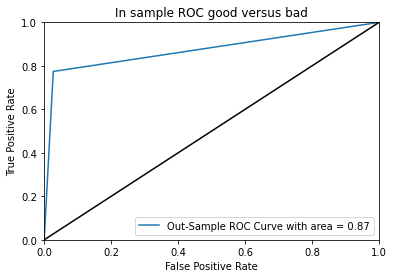

Text(0.5, 0, 'Relative Importance')

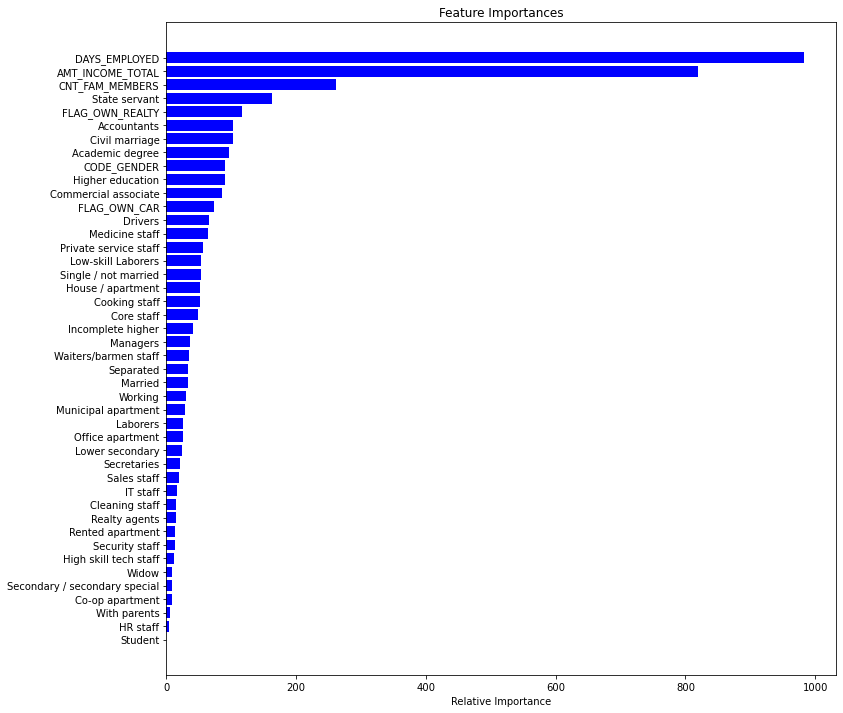

In [20]:
model_gbm_best = LGBMClassifier(max_depth = 15, num_leaves = 40, random_state = rs)
classifier = model_gbm_best
classifier.fit(xTrain, yTrain)
train_score = classifier.score(xTrain, np.ravel(yTrain))
print('train score',train_score)
test_score = classifier.score(xTest, yTest)
print('test score',test_score)

y_pred = classifier.predict(xTest)
tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
fnr = fn/(tp+fn)
print("false negative rate:",fnr)

print(classification_report(yTest, y_pred))

(fpr, tpr, thresholds) = roc_curve(yTest,y_pred)
area = auc(fpr,tpr)
print("AUC area",area)

pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC good versus bad')
pl.legend(loc="lower right")
pl.show()

model = model_gbm_best
# Draw feature importance level
import matplotlib.pyplot as plt
%matplotlib inline
feature_names = [key for key in xTrain]
importances = model.feature_importances_ 
indices = np.argsort(importances) 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance') 

In [21]:
### Final Model------------------------------------
# After comparing each model, we choose random forest as our final model. 
# Even though XGBoost fnr and accuracy perform a little bit better, when looking at feature importances, the most important features are accountants, sales staff, etc, which are too specific.
# Thus, we prefer Random Forest, because it also performs well and important attributes are more helpful in real wrold.
model = model_rf_1

Text(0.5, 0, 'Relative Importance')

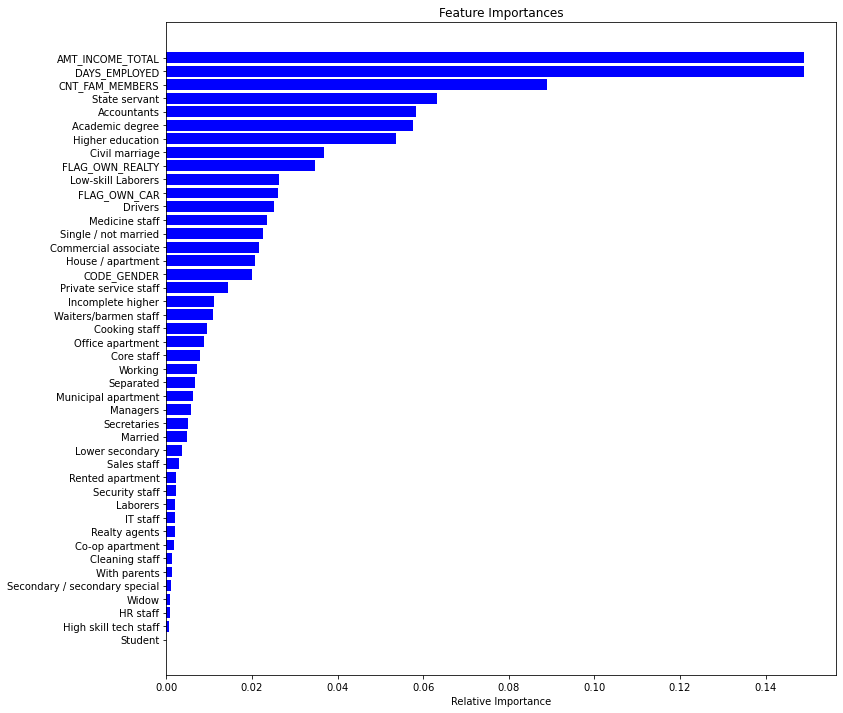

In [22]:
# Draw feature importance level
%matplotlib inline
feature_names = [key for key in xTrain]
importances = model.feature_importances_ 
indices = np.argsort(importances) 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance') 